# Analyzing the Growth of Indian Startups-Financial Analytics

This dataset has funding information of the Indian startups from January 2015 to August 2017. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).

data dapat diakses melalu : https://www.kaggle.com/sudalairajkumar/indian-startup-funding

# Possible questions which could be answered are:


1. What is the general amount that startups get in india ?

2. What kind of industries is more preferred for startups ?

3. Does location also play a role, in determining the growth of a startup ?

4. Who plays the main role in Indian startups ecosystem ?

5. What are the different types of funding for startups ? 

In [533]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os

In [534]:
os.listdir()

['.ipynb_checkpoints',
 'Analyzing the Growth of Indian Startups-Financial Analytics.ipynb',
 'startup_funding.csv']

In [535]:
# Select a background style 

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,7)

In [536]:
# For interactivity 

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

## Reading the Data

In [537]:
# Import the data 

missing_values = ["n/a", "nan", "--",'?'] 

data = pd.read_csv('startup_funding.csv', na_values = missing_values)
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [538]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [539]:
# Ubah nama variabel

data.columns=['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks']

In [540]:
# Check shape dari datase

data.shape

(3044, 10)

In [541]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,3044.0,1522.5,878.871435,1.0,761.75,1522.5,2283.25,3044.0


# Data Cleaning

In [542]:
def clean_string(x):
    return str(x).replace('\\xc2\\xa0','').replace('\\\\xc2\\\\xa0','')

for col in ['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks']:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
    

## Missing Data

In [543]:
# Import warnings module 

import warnings
warnings.filterwarnings('ignore')

In [544]:
# Hitung julah missing value 

total = data.isnull().sum().sort_values(ascending=False)

In [545]:
# Hitung berapa persen data yang hilang pada setiap variabel 

percent = ((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

In [546]:
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent %'])
missing_data

,Total,Percent %
SNo,0,0.0
Date,0,0.0
StartupName,0,0.0
IndustryVertical,0,0.0
SubVertical,0,0.0
CityLocation,0,0.0
InvestorsName,0,0.0
InvestmentType,0,0.0
AmountInUSD,0,0.0
Remarks,0,0.0


In [547]:
# Karena varibel Remarks mostly berisi NaN, maka sebaiknya kita membuang variabel tersebut

data.drop(['Remarks'],axis=1,inplace=True)

In [548]:
data['AmountInUSD'].sort_values(ascending=False).head(20)

34          unknown
91      undisclosed
89      undisclosed
20      undisclosed
2447            nan
1240            nan
1239            nan
1238            nan
1236            nan
1235            nan
1230            nan
1228            nan
1223            nan
1242            nan
1222            nan
2448            nan
1219            nan
1218            nan
1216            nan
1212            nan
Name: AmountInUSD, dtype: object

***Seperti yang dapat kita lihat variabel AmountInUSD berbentuk string, maka untuk mengolahnya kita harus mengubahnya ke dalam bentuk angka dan membersihkan datanya menjadi format angka yang benar***


In [549]:
# Membersihkan data pada variabel AmountInUSD

def clean_amount(x):
    # mengubah AmountInUSD kedalam bentuk string dan menggabungkannya tanpa ','
    x = ''.join([c for c in str(x) if c in ['0','1','2','3','4','5','6','7','8','9']]) 
    # mengubah AmountInUSD kedalam bentuk string dan menggabungkannya tanpa ',' dan '+'
    x = str(x).replace(',','').replace('+','')
    # mengubah AmountInUSD kedalam bentuk string dan mengubah Undisclosed menjadi ''
    x = str(x).lower().replace('Undisclosed','')
    # mengubah AmountInUSD kedalam bentuk string dan mengubah 'n/a' menjadi ''
    x = str(x).lower().replace('n/a','')
    if x == '':
        x = '-999'
    return x

# apply fungsi ke kolom AmountInUSD
data['AmountInUSD'] = data['AmountInUSD'].apply(lambda x: float(clean_amount(x)))

In [550]:
data['AmountInUSD'].dtypes

dtype('float64')

In [551]:
# Cek data setelah dibersihkan

data['AmountInUSD'].sort_values(ascending=False).head(20)

60      3.900000e+09
651     2.500000e+09
83      1.510950e+09
830     1.400000e+09
966     1.400000e+09
31      1.000000e+09
2648    7.000000e+08
2459    6.800000e+08
188     6.000000e+08
33      5.850000e+08
2244    5.000000e+08
2470    5.000000e+08
76      4.889976e+08
42      4.500000e+08
2820    4.000000e+08
924     3.300000e+08
350     3.000000e+08
135     3.000000e+08
29      2.830000e+08
81      2.739035e+08
Name: AmountInUSD, dtype: float64

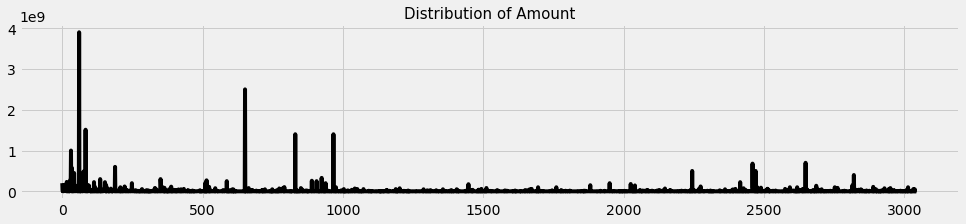

In [552]:
plt.rcParams['figure.figsize'] = (15,3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

***Perhatikan pada beberapa tanggal memiliki format yang tidak sesuai, maka kita harus mengubahnya secara manual***

In [553]:
data['Date'][data['Date']=='12/05.2015'] 

2775    12/05.2015
2776    12/05.2015
Name: Date, dtype: object

In [554]:
data['Date'][data['Date']=='13/04.2015'] 

2831    13/04.2015
Name: Date, dtype: object

In [555]:
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01.2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

# 1. What is the general amount that startups get in india ?

In [556]:
# Rata rata pendapatan setiap startups di India 

data.groupby(['StartupName'])['AmountInUSD'].mean().sort_values(ascending=False).mean()

9905534.181656396

In [557]:
# Top 10 startups dengan jumlah penghasilan tertinggi

amount = data.groupby(['StartupName'])['AmountInUSD'].sum().sort_values(ascending=False).head(10)

In [558]:
amount = pd.DataFrame(amount)
amount

,AmountInUSD
StartupName,
Flipkart,4.059700e+09
Rapido Bike Taxi,3.900000e+09
Paytm,3.148948e+09
Pratilipi,1.515250e+09
Ola,9.845000e+08
Udaan,8.700000e+08
Flipkart.com,7.000000e+08
Snapdeal,7.000000e+08
Ola Cabs,6.696990e+08


In [559]:
label10=np.arange(0,10)
fig=go.Figure(data=[go.Bar(y=amount['AmountInUSD'],x=amount.index, marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black" 
fig.show()

# 2. What kind of industries is more preferred for startups ?

***Explore variabel Industry Vertical (Tergolong industri apa mereka)***

In [560]:
data['IndustryVertical'].nunique()

822

***Ada 821 unique jenis industry vertical***

In [561]:
# Cek missing values 

data["IndustryVertical"].isnull().sum()

0

In [562]:
# Ganti semua missing values menjadi 'Consumer Technology'

data["IndustryVertical"] = data["IndustryVertical"].fillna('Consumer Technology')

In [563]:
data["IndustryVertical"].values == 'nan'

array([False, False, False, ...,  True,  True,  True])

In [564]:
data["IndustryVertical"].value_counts().head(10)

Consumer Internet    941
Technology           478
eCommerce            186
nan                  171
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Name: IndustryVertical, dtype: int64

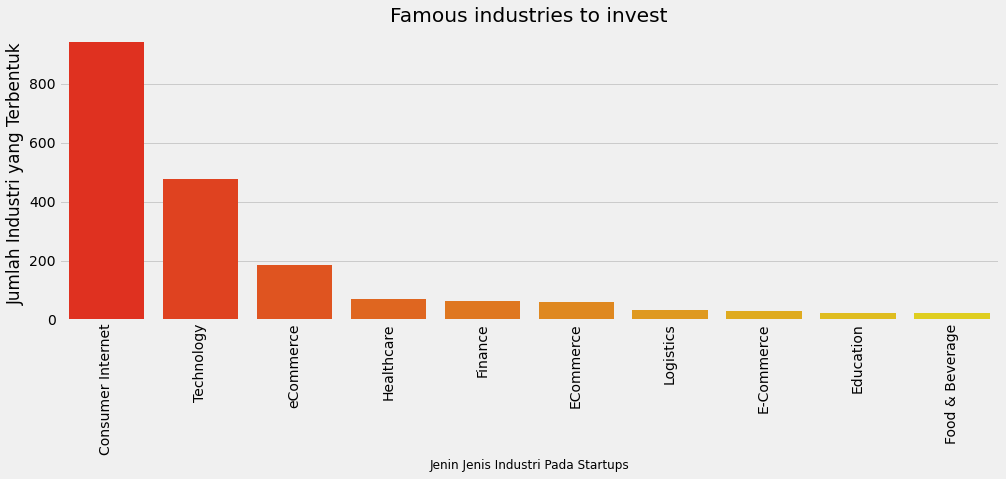

In [592]:
top=data["IndustryVertical"].value_counts().head(10) 
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(top.index,top.values,palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Jenin Jenis Industri Pada Startups',fontsize=12)
plt.ylabel('Jumlah Industri yang Terbentuk')
plt.title('Famous industries to invest')
plt.show()

# 3. Does location also play a role, in determining the growth of a startup ?

In [566]:
# Top 10 Cities with Highest number of Startups

cities=data["CityLocation"].value_counts().head(10).reset_index()
cities.columns=["City","Number"]
cities

,City,Number
0,Bangalore,701
1,Mumbai,568
2,New Delhi,424
3,Gurgaon,291
4,nan,180
5,Bengaluru,141
6,Pune,105
7,Hyderabad,99
8,Chennai,97
9,Noida,93


In [567]:
fig=go.Figure(data=[go.Scatter(x=cities.City,y=cities.Number,mode='markers',marker_size=(cities.Number)/6,  marker={'color':label10})])
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black" 
fig.update_layout(autosize=True,plot_bgcolor='rgb(275, 275, 275)')
fig.show()

# 4. Who plays the main role in Indian startups ecosystem ?

In [591]:
# Top 10 investors 

investors = pdate_df['InvestorsName'].value_counts().head(11).reset_index()
investors.columns=["InvestorsName", "Number"]
investors

,InvestorsName,Number
0,Undisclosed investors,30
1,Ratan Tata,25
2,NaN,24
3,Indian Angel Network,24
4,Kalaari Capital,16
5,Sequoia Capital,15
6,Group of Angel Investors,15
7,Accel Partners,12
8,Undisclosed Investor,12
9,Brand Capital,11


In [569]:
# We will remove Undisclosed row

investors.drop([0,2,8],axis=0,inplace=True)

In [570]:
investors

,InvestorsName,Number
1,Ratan Tata,25
3,Indian Angel Network,24
4,Kalaari Capital,16
5,Sequoia Capital,15
6,Group of Angel Investors,15
7,Accel Partners,12
9,Brand Capital,11
10,Venture Catalysts,11


In [571]:
fig=go.Figure(data=[go.Scatter(x=investors.InvestorsName,y=investors.Number,mode='markers',marker_size=(investors.Number)*3,  marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig.show()

# 5. What are the different types of funding for startups ? 

In [572]:
data['InvestmentType'].nunique()

56

***Ada 50 tipe tipe jenis pendanaan untuk startup***

In [573]:
data['InvestmentType'].value_counts()

Private Equity                 1356
Seed Funding                   1355
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Series A                         24
Seed/Angel Funding               23
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Pre-Series A                      4
Seed                              4
nan                               4
Private Equity Round              4
Seed / Angle Funding              3
Series F                          2
Corporate Round                   2
Equity                            2
Venture Round                     2
pre-Series A                      2
Series E                          2
Pre Series A                      1
Private Funding                   1
Crowd funding                     1
Funding Round               

In [574]:
## Data celaning 

data['InvestmentType'] = data['InvestmentType'].apply(lambda x: (str(x).replace("\\\\n"," ")))


for i in range(0, len(data["InvestmentType"])):
    if data["InvestmentType"][i] in ["Seed/ Angel Funding","Seed / Angel Funding","Seed/Angel Funding",
                                       "Seed / Angle Funding", "Angel / Seed Funding"]:
        data["InvestmentType"][i]="Seed Angel Funding"
    
  

top7=data["InvestmentType"].value_counts().head(7)

In [575]:
colrs = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig=go.Figure(data=[go.Pie(labels=top7.index,values=top7.values)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colrs))
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"                
fig.update_layout(height=600,autosize=True ,plot_bgcolor='rgb(275, 275, 275)')

fig.show()

# Lets see most common words in SubVertical using WordCloud

In [576]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [586]:
# Cek apakah masih ada nan pada variabel

data["SubVertical"].unique()

array(['E-learning', 'App based shuttle service',
       'Retailer of baby and toddler products', ...,
       'Hobby & Activity Class Aggregator', 'Interior Design Marketplace',
       'nan'], dtype=object)

In [582]:
data["SubVertical"][data["SubVertical"]== 'nan'].index

Int64Index([2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117,
            ...
            3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043],
           dtype='int64', length=936)

In [587]:
# Frop semua record nan

data = data.drop(data["SubVertical"][data["SubVertical"]== 'nan'].index)

In [588]:
data.dropna()
text=[]
for i in range (0, len(data["SubVertical"])):
  if type(data["SubVertical"][i])==str:
    text.append(data["SubVertical"][i])
   
text=" ".join(text) 
text = text.split(" ")
# text=set(text)
text=" ".join(text) 

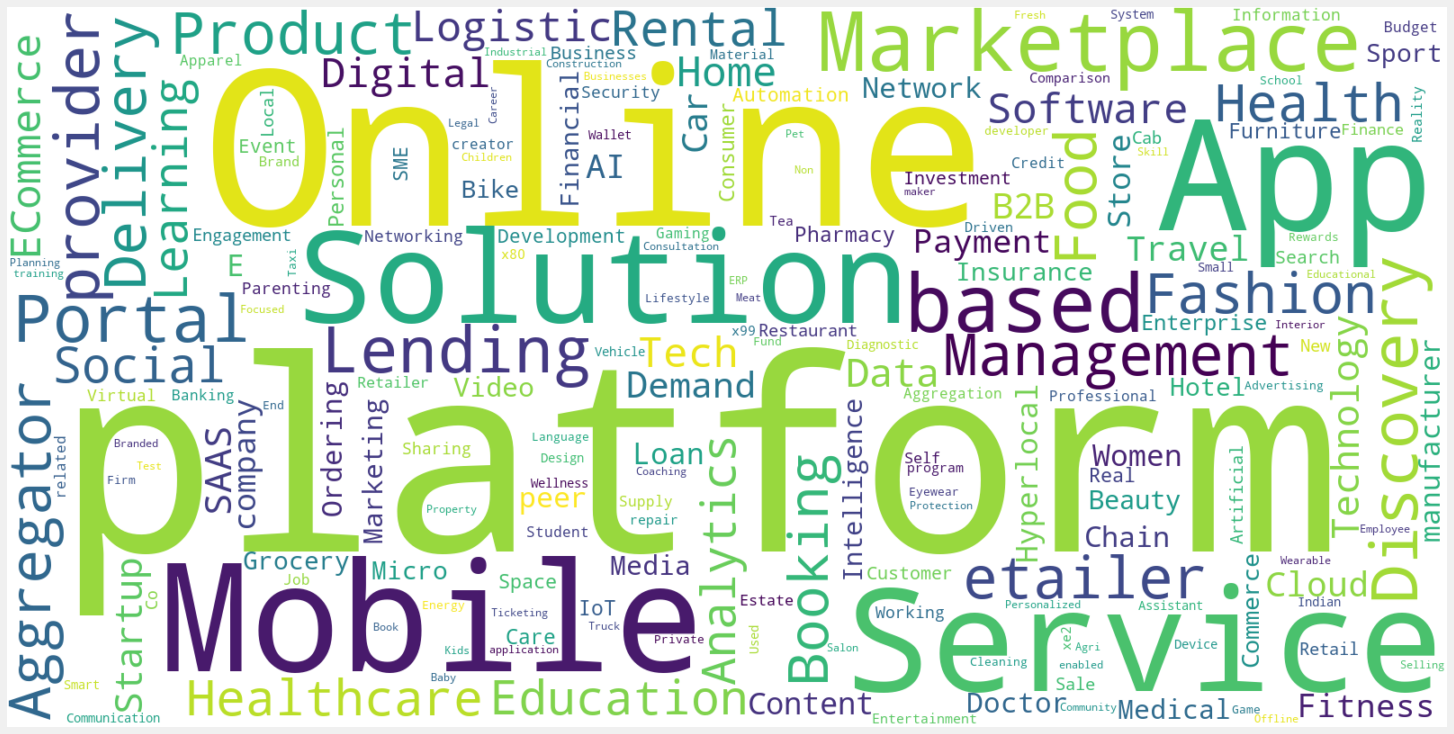

In [589]:
wordcloud = WordCloud( max_words=200, background_color="white",collocations=False, width=1600, height=800).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()